In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
pima = pd.read_csv('diabetes.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
col_names = ['Pregnant','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Target']

In [12]:
pima = pd.read_csv('diabetes.csv',header=None,names=col_names)

In [13]:
pima

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [14]:
pima = pima.drop(pima.index[0])

In [15]:
pima.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [16]:
pima.reset_index(inplace = True)

In [17]:
pima.head()

,index,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Target
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [19]:
x = pima[['Pregnant','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age']]

In [22]:
y = pima.Target

In [23]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [67]:
dclf = DecisionTreeClassifier()

In [68]:
dclf = dclf.fit(xtrain,ytrain)

In [69]:
ypred = dclf.predict(xtest)

In [70]:
from sklearn import metrics

In [71]:
print("Accuracy:",metrics.accuracy_score(ytest,ypred))

Accuracy: 0.7337662337662337


##### Decision Tree Regressor

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
df = pd.read_csv('IceCreamData.csv')

In [74]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [75]:
x = df['Temperature'].values
y = df['Revenue'].values

In [77]:
print(type(x))

<class 'numpy.ndarray'>


In [78]:
print(type(y))

<class 'numpy.ndarray'>


In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [80]:
from sklearn.tree import DecisionTreeRegressor
drg = DecisionTreeRegressor()

In [82]:
drg.fit(xtrain.reshape(-1,1),ytrain.reshape(-1,1))

DecisionTreeRegressor()

In [83]:
ypred = drg.predict(xtest.reshape(-1,1))

In [84]:
df = pd.DataFrame({'Real Values':ytest.reshape(-1),'Predicted Values':ypred.reshape(-1)})

In [85]:
df

,Real Values,Predicted Values
0,651.861536,706.364904
1,212.483559,198.121563
2,850.246982,857.526641
3,542.608070,570.990932
4,612.243721,627.901841
...,...,...
95,493.115468,566.217304
96,437.828710,427.211360
97,507.356810,458.860905
98,565.875000,569.618756


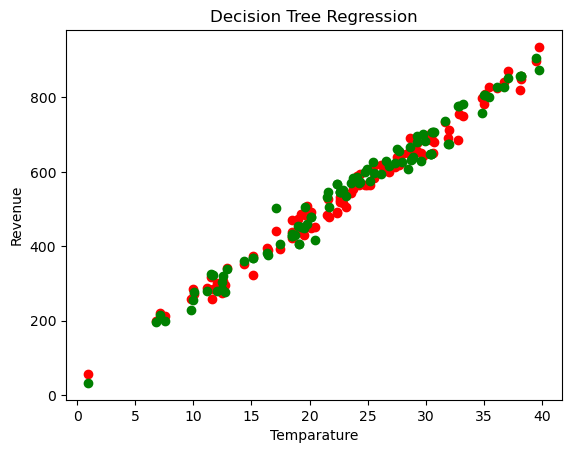

In [86]:
plt.scatter(xtest,ytest,color = 'red')
plt.scatter(xtest,ypred,color='green')
plt.title('Decision Tree Regression')
plt.xlabel('Temparature')
plt.ylabel('Revenue')
plt.show()